# 1) NTLK method #





In [2]:
import nltk
import random 
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

### Read the file and tokenization of text ###

In [3]:
#read file
with open('wsj_untokenized.txt', 'r') as f:
    text = f.read()

#tokenization
tokens = nltk.word_tokenize(text)


### Number of tokens ###


In [4]:
#find length of tokens
num_tokens = len(tokens)
print("Number of tokens:", num_tokens)

Number of tokens: 93530


### Number of unique tokens ###

In [5]:
#find length of set and set is unique tokens ignoring capitalization etc.
num_unique_tokens = len(set(tokens))
print("Number of unique tokens:", num_unique_tokens)

Number of unique tokens: 12000


### Print a random sentence and the tokens in the random sentence ###

In [6]:
sentences = nltk.sent_tokenize(text)

random_sentence = random.choice(sentences)

tokens_in_random_sentence = nltk.word_tokenize(random_sentence)

print(random_sentence)

print(tokens_in_random_sentence)

Excluding these orders, backlogs declined 0.3%.
['Excluding', 'these', 'orders', ',', 'backlogs', 'declined', '0.3', '%', '.']


### Table of tokenization probabilities ###

In [7]:
token_counts = Counter(tokens)


total_tokens = len(tokens)


token_probs = {token: count / total_tokens for token, count in token_counts.items()}


top_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)[:20]


print("{:<10} {:<20} {:<20} {:<20} {:<20}".format("Position", "Token", "Count", "Probability", "Position * Probability"))


for i, (token, count) in enumerate(top_tokens):
    probability = token_probs[token]
    position_times_probability = (i+1) * probability
    print("{:<10} {:<20} {:<20} {:<20.5f} {:<20.5f}".format(i+1, token, count, probability, position_times_probability))

Position   Token                Count                Probability          Position * Probability
1          ,                    4823                 0.05157              0.05157             
2          the                  4041                 0.04321              0.08641             
3          .                    3819                 0.04083              0.12250             
4          of                   2312                 0.02472              0.09888             
5          to                   2157                 0.02306              0.11531             
6          a                    1857                 0.01985              0.11913             
7          in                   1563                 0.01671              0.11698             
8          and                  1489                 0.01592              0.12736             
9          ''                   959                  0.01025              0.09228             
10         's                   863             

### Calculation of the percentages of tokens that appear exactly once, exactly 2 times, and exactly 3 times ###

In [8]:
num_once = sum(1 for count in token_counts.values() if count == 1)
num_twice = sum(1 for count in token_counts.values() if count == 2)
num_thrice = sum(1 for count in token_counts.values() if count == 3)


pct_once = 100 * num_once / total_tokens
pct_twice = 100 * num_twice / total_tokens
pct_thrice = 100 * num_thrice / total_tokens


print("Percentage of tokens that appear exactly once: {:.2f}%".format(pct_once))
print("Percentage of tokens that appear exactly twice: {:.2f}%".format(pct_twice))
print("Percentage of tokens that appear exactly three times: {:.2f}%".format(pct_thrice))

Percentage of tokens that appear exactly once: 6.69%
Percentage of tokens that appear exactly twice: 1.96%
Percentage of tokens that appear exactly three times: 0.97%


### Calculation of the expected percentages of tokens that appear exactly once, exactly 2 times, and exactly 3 times ###

In [9]:
pct_once_expected = 100 * (1/(1*(1+1))) #n=1
pct_twice_expected = 100 * (1/(2*(2+1))) #n=2
pct_thrice_expected = 100 * (1/(3*(3+1))) #n=3


print("Expected percentage of tokens that appear exactly once: {:.2f}%".format(pct_once_expected))
print("Expected percentage of tokens that appear exactly twice: {:.2f}%".format(pct_twice_expected))
print("Expected percentage of tokens that appear exactly three times: {:.2f}%".format(pct_thrice_expected))

Expected percentage of tokens that appear exactly once: 50.00%
Expected percentage of tokens that appear exactly twice: 16.67%
Expected percentage of tokens that appear exactly three times: 8.33%


### Calculation of A and plotting of Actual frequencies-Rank vs Expected frequencies-Rank ###

The best value found for constant A is: 0.10348978313553585


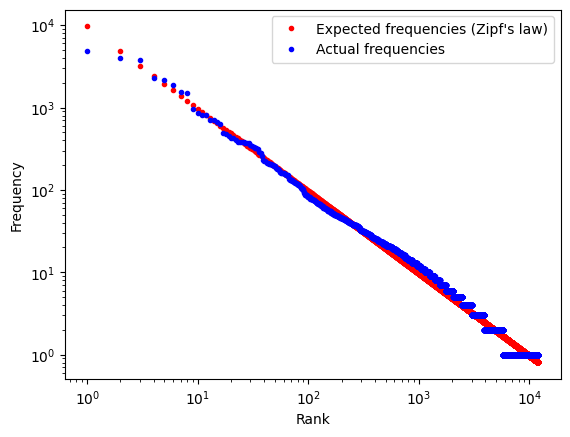

In [11]:
sorted_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

frequencies = [count for token, count in sorted_counts]

ranks = np.arange(1, len(frequencies) + 1)

A_values = []
A_values_sum = 0;
for i in range(len(frequencies)):
    
    A = (frequencies[i] / num_tokens) * ranks[i]
    A_values_sum = A_values_sum+A
    A_values.append(A)

# the best value found should be the average value since A is a constant
average= A_values_sum/len(frequencies)
print("The best value found for constant A is:",average)

expected_frequencies = [0] * len(frequencies)

# expected frequencies  (solved for A)
for i in range(len(frequencies)):

    expected_frequencies[i] = average * num_tokens / ranks[i]

# actual frequencies vs expected frequencies

plt.plot(ranks, expected_frequencies, 'r.', label='Expected frequencies (Zipf\'s law)')
plt.plot(ranks, frequencies, 'b.', label='Actual frequencies')

plt.xscale('log')
plt.yscale('log')


plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()


plt.show()